In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle

In [2]:
df = pd.read_csv('six_countries_height_samples.csv')

In [3]:
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


In [6]:
df1 = df[['height_cm']]

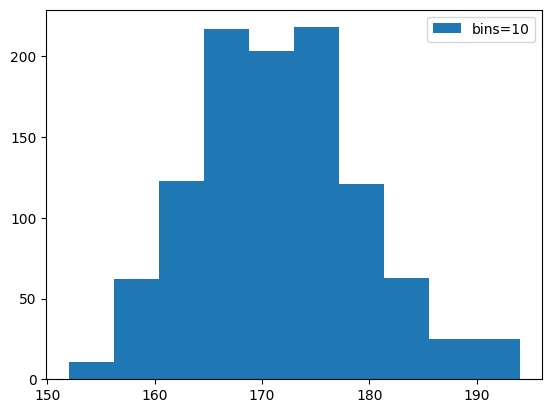

In [9]:
plt.hist(df1, bins = 10, label = "bins=10")
plt.legend()
plt.show()

In [12]:
df1_1 = df[df['sex'].isin(["man"])]
df1_1 = df1_1[['height_cm']]

In [14]:
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df[['height_cm']]

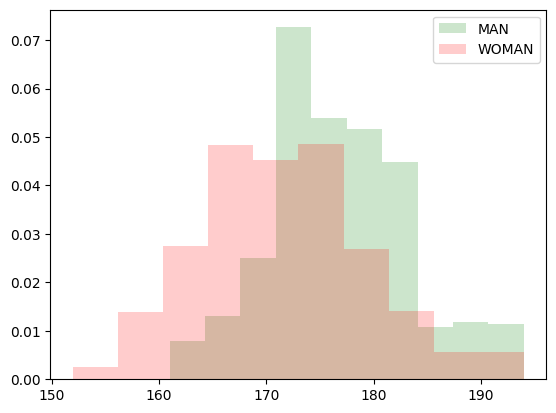

In [15]:
plt.hist(df1_1, color = 'green', alpha = 0.2, bins = 10, label = 'MAN', density = True)
plt.hist(df1_2, color = 'red', alpha = 0.2, bins = 10, label = 'WOMAN', density = True)
plt.legend()
plt.show()


In [17]:
df2 = df[['country', 'height_cm']]
df2 = df2[df2['height_cm'] >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


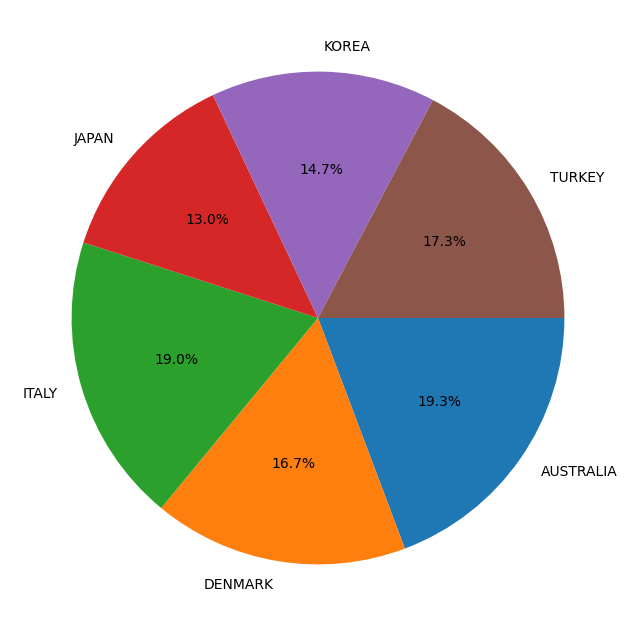

In [18]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.pie(df2['height_cm'], labels = df2['country'], startangle = 0, counterclock = False, autopct = lambda p : '{:.1f}%'.format(p))
plt.show()

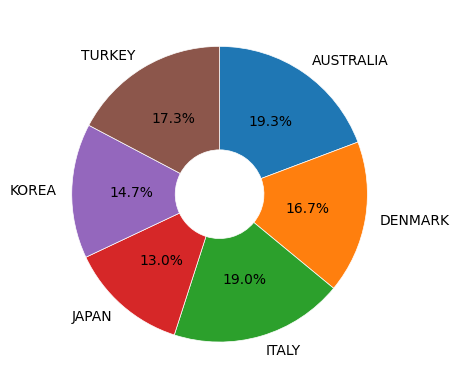

In [20]:
wedgeprops = {'width' : 0.7, 'edgecolor' : 'w', 'linewidth' : 0.5}

plt.pie(df2['height_cm'], labels = df2['country'], startangle = 90, counterclock = False, autopct = lambda p : '{:.1f}%'.format(p), wedgeprops = wedgeprops)
plt.show()

In [26]:
df3 = df[['country', 'sex', 'height_cm']]
df3 = df3[df3['height_cm'] >= 175]

df3 = df3.groupby(['country', 'sex']).count().reset_index()
df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [28]:
fig = px.treemap(df3, path = ['sex', 'country'], values = 'height_cm', color = "height_cm", color_continuous_scale = 'viridis')
fig.show()

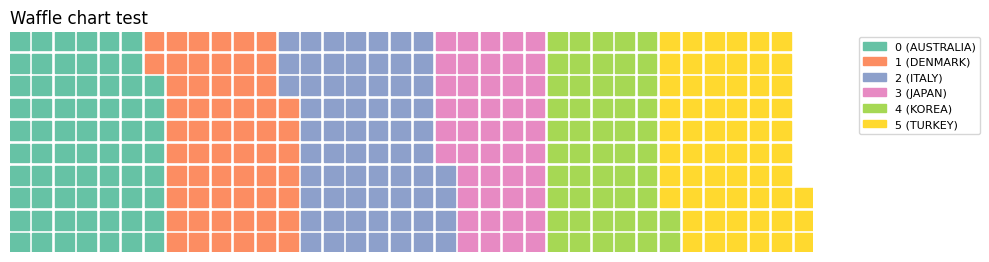

In [30]:
fig = plt.figure(FigureClass = Waffle,
                 plots = {
                     111: {'values' : df2['height_cm'],
                     'labels' : ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
                     'legend' : {'loc' : 'upper left', 'bbox_to_anchor' : (1.05, 1), 'fontsize' : 8},
                     'title' : {'label' : 'Waffle chart test', 'loc' : 'left'}, 
                 }
                 },
                 rows = 10,
                 figsize = (10, 10)
                )